# **Import the libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

# **Import the dataset**

In [70]:
df=pd.read_csv("haberman.csv")

In [71]:
df.columns=["patient_age","operation_year","positive_axillary_nodes","survival_status"]

In [72]:
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [73]:
df.tail()

,patient_age,operation_year,positive_axillary_nodes,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


# **Data Understanding**

In [74]:
df.shape

(305, 4)

In [75]:
df["survival_status"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
300    1
301    1
302    1
303    2
304    2
Name: survival_status, Length: 305, dtype: int64>

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [77]:
df["survival_status"]=df["survival_status"].map({1:"yes",2:"no"})

In [78]:
df

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
...,...,...,...,...
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_age              305 non-null    int64 
 1   operation_year           305 non-null    int64 
 2   positive_axillary_nodes  305 non-null    int64 
 3   survival_status          305 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [80]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


# **Unique Values In Each Feature Coulmn**

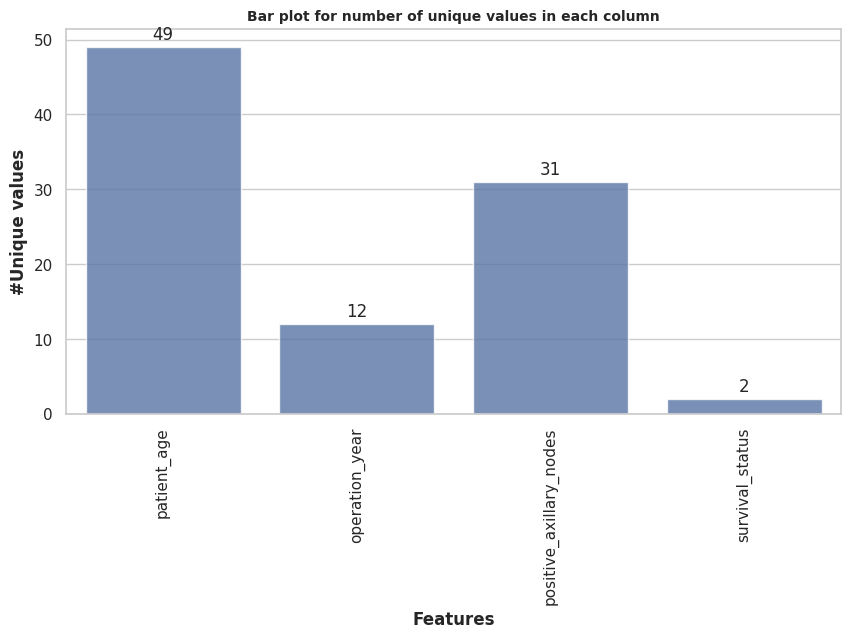

In [81]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(10,5))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=10)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# **PieChart**

In [82]:
loc_analysis = pd.DataFrame(df['patient_age'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'patient_age':'count'})

In [83]:
import plotly.graph_objects as go

In [84]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "patient_age",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of patient_age</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [85]:
loc_analysis = pd.DataFrame(df['operation_year'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'operation_year':'count'})

In [86]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "operation_year",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of operation_year</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [87]:
loc_analysis = pd.DataFrame(df['positive_axillary_nodes'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'positive_axillary_nodes':'count'})

In [88]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "positive_axillary_nodes",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of positive_axillary_nodes</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [89]:
loc_analysis = pd.DataFrame(df['survival_status'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'survival_status':'count'})

In [90]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "survival_status",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of survival_status</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

# **Class wise Statical Analysis**

In [91]:
survival_yes=df[df['survival_status']=="yes"]

In [92]:
survival_yes.describe()

,patient_age,operation_year,positive_axillary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [93]:
survival_no=df[df['survival_status']=="no"]

In [94]:
survival_no.describe()

,patient_age,operation_year,positive_axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# **Uni_Variate data Analysis**

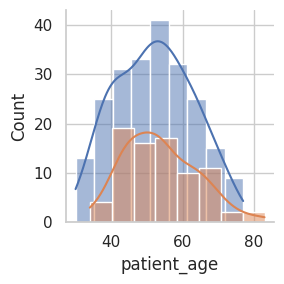

<Figure size 1500x800 with 0 Axes>

In [95]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  sns.FacetGrid(df, hue="survival_status").map(sns.histplot, "patient_age", kde=True)
  plt.figure(figsize=(15,8))
  plt.show()

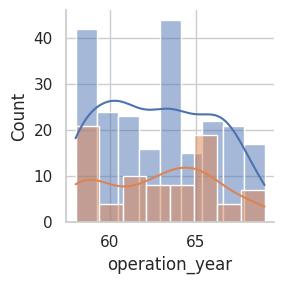

<Figure size 1500x800 with 0 Axes>

In [96]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  sns.FacetGrid(df, hue="survival_status").map(sns.histplot, "operation_year", kde=True)
  plt.figure(figsize=(15,8))
  plt.show()

# **Number of positive axillary nodes**

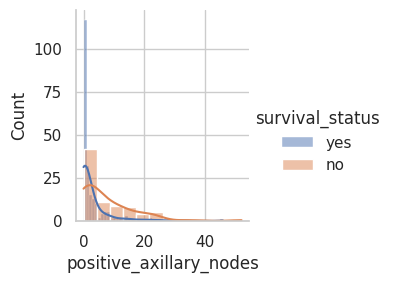

<Figure size 1200x600 with 0 Axes>

In [97]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  g=sns.FacetGrid(df, hue="survival_status")
  g.map(sns.histplot, "positive_axillary_nodes", kde=True)
  g.add_legend()
  plt.figure(figsize=(12,6))
  plt.show()

# **Boxplot**

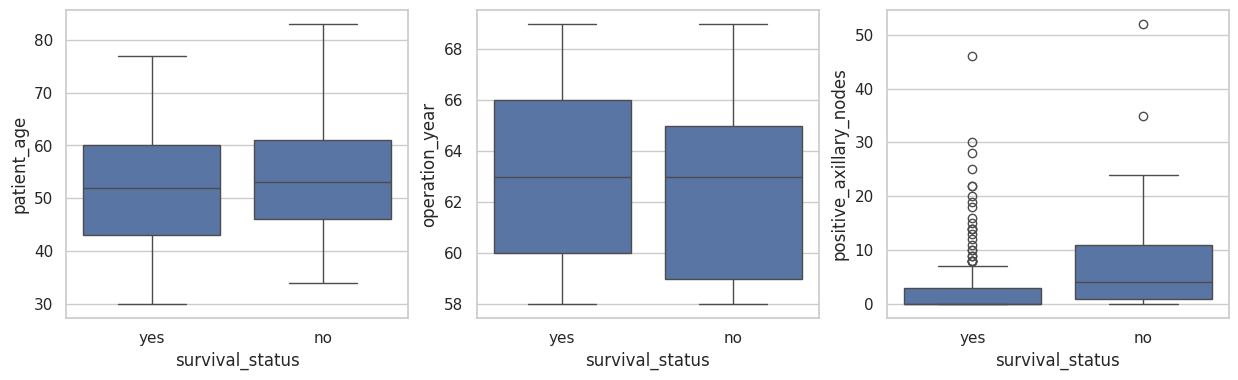

In [98]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x="survival_status", y="patient_age", data=df)
plt.subplot(1,3,2)
sns.boxplot(x="survival_status", y="operation_year", data=df)
plt.subplot(1,3,3)
sns.boxplot(x="survival_status", y="positive_axillary_nodes", data=df)
plt.show()

# **Violin plot**

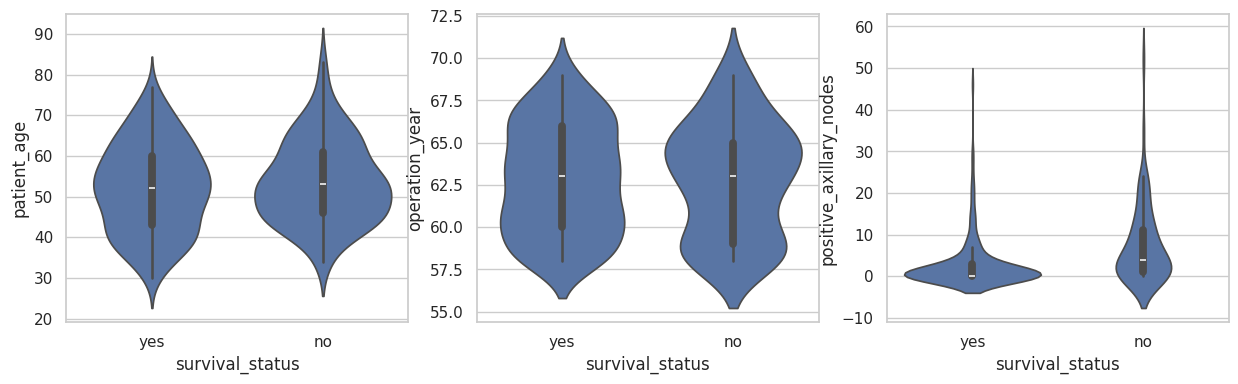

In [99]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.violinplot(x="survival_status", y="patient_age", data=df)
plt.subplot(1,3,2)
sns.violinplot(x="survival_status", y="operation_year", data=df)
plt.subplot(1,3,3)
sns.violinplot(x="survival_status", y="positive_axillary_nodes", data=df)
plt.show()

# **Bi_Variate data Analysis**

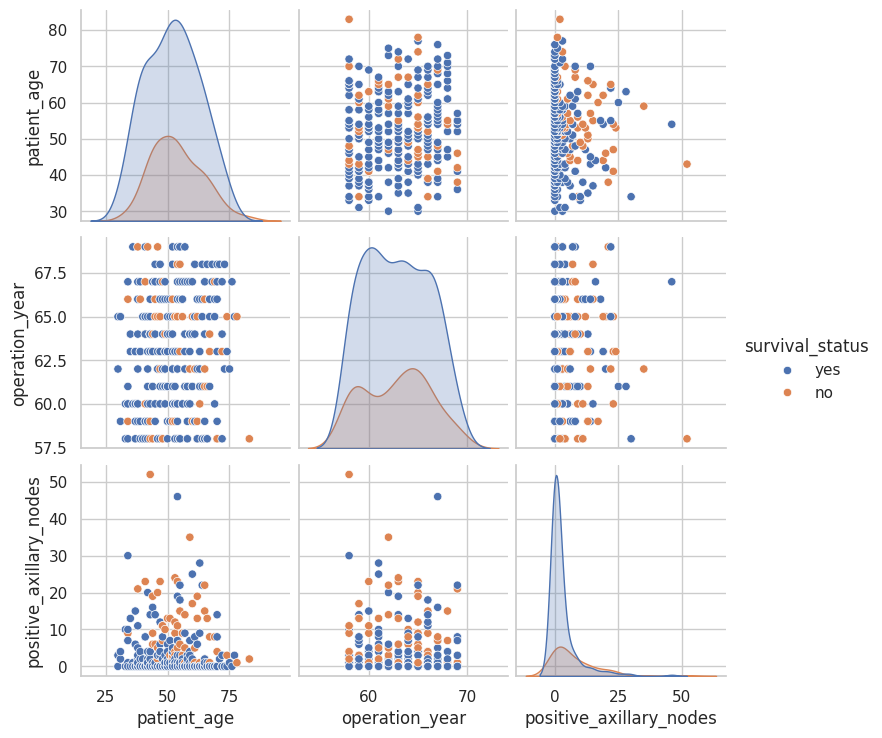

<Figure size 1200x800 with 0 Axes>

In [100]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="survival_status")
plt.figure(figsize=(12,8))
plt.show()

# **Joint plot**

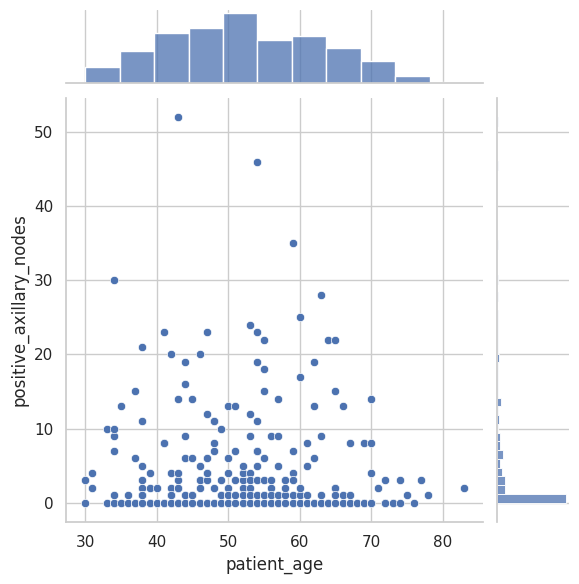

In [101]:
sns.jointplot(x="patient_age",y="positive_axillary_nodes",data=df)
plt.show()

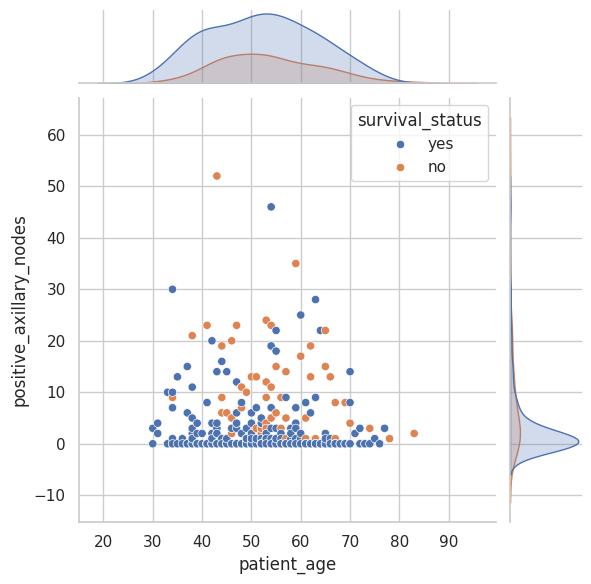

In [102]:
sns.jointplot(x="patient_age",y="positive_axillary_nodes",data=df,hue="survival_status")
plt.show()

# **Heatmap**

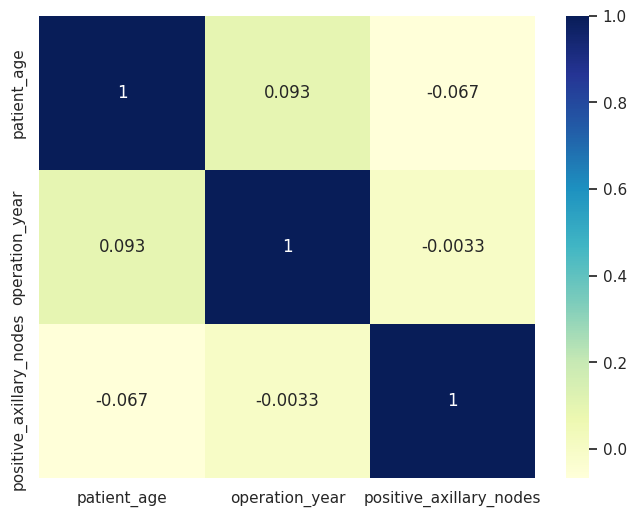

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 0:3].corr(), cmap="YlGnBu", annot=True)
plt.show()